# 参考链接
https://jinnsjj.github.io/tech/audio/librosa-audio/

In [1]:
from __future__ import print_function,division
import matplotlib.pyplot as plt
import seaborn
from scipy import signal 
import librosa.display
plt.style.use('ggplot')
%matplotlib inline

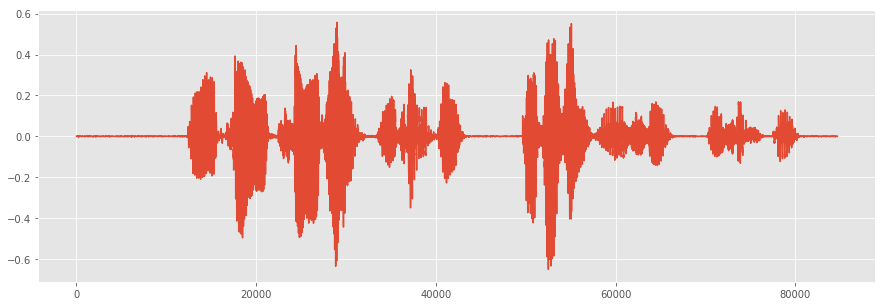

In [2]:
import os 
import librosa
wav = librosa.load('E:\wxgzh_code\speech0.wav',sr=22050)[0]
plt.figure(figsize=(15,5))
plt.plot(wav)
plt.show()

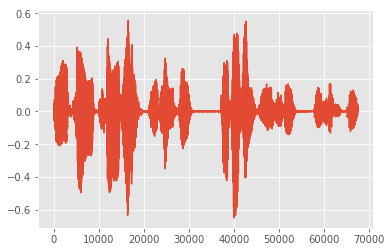

In [3]:
#去除静音
trim_top_db =23
trim_fft_size = 512
trim_hop_size = 128
wav = librosa.effects.trim(wav, top_db= trim_top_db, frame_length=trim_fft_size, hop_length=trim_hop_size)[0]
plt.plot(wav)
plt.show()

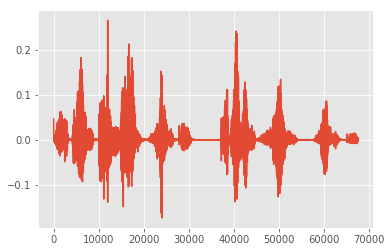

In [4]:
#预加重
k = 0.973
wav = signal.lfilter([1, -k], [1], wav)
plt.plot(wav)
plt.show()

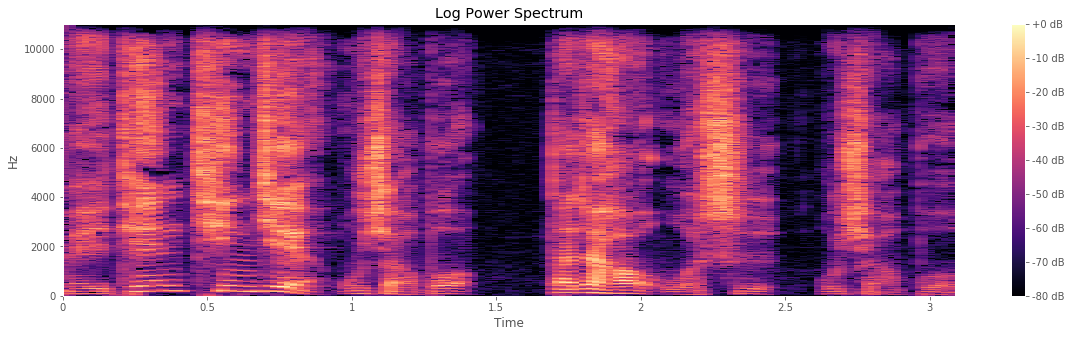

In [5]:
#频谱
import numpy as np
sr = 22050
S = np.abs(librosa.stft(wav))
Xdb = librosa.power_to_db(S**2, ref=np.max)
# Xdb = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(20,5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Log Power Spectrum')
plt.show()

melspectrogram.shape: (128, 133)


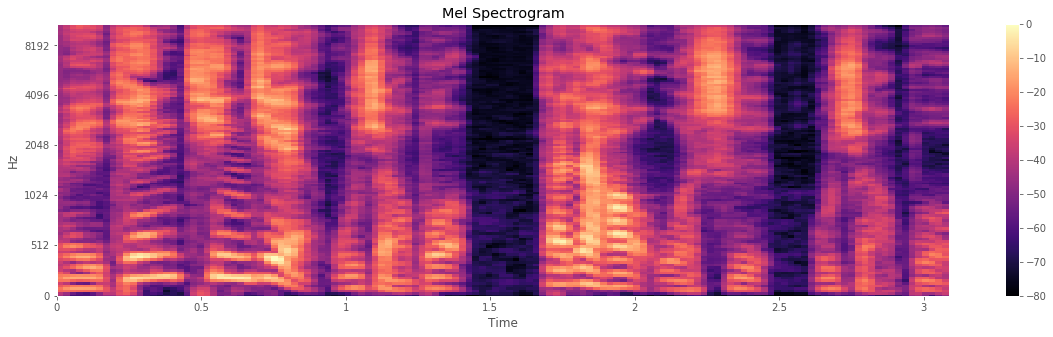

In [6]:
#计算对数谱图
# S = np.abs(librosa.stft(x))
mel = librosa.feature.melspectrogram(y=wav, sr=sr)
meldb = librosa.power_to_db(mel,ref=np.max)
print('melspectrogram.shape: '+str(mel.shape))
plt.figure(figsize=(20,5))
librosa.display.specshow(meldb, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title('Mel Spectrogram')
plt.show()

mfccs.shape: (40, 133)


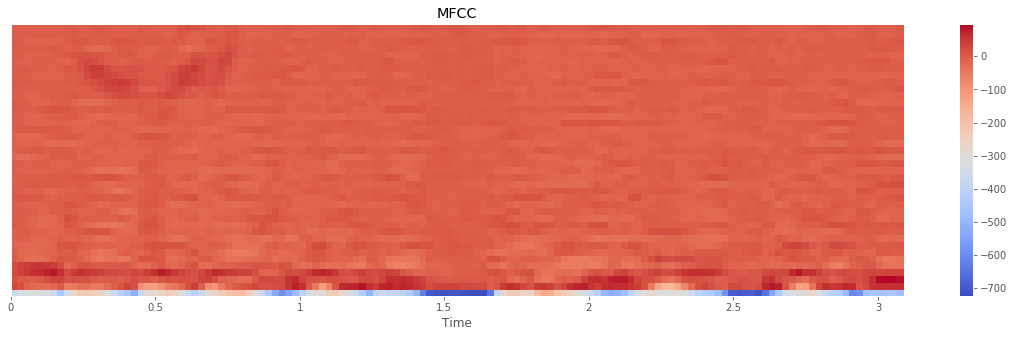

In [7]:
#计算MFCC
mfccs = librosa.feature.mfcc(y=wav, sr=sr, n_mfcc=40)
print('mfccs.shape: '+str(mfccs.shape))
plt.figure(figsize=(20,5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

chroma.shape: (12, 133)


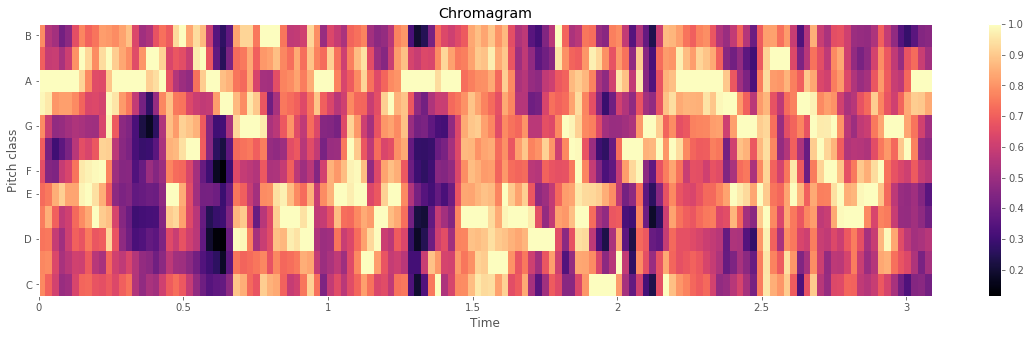

In [8]:
#计算色度图
S = np.abs(librosa.stft(wav))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
print('chroma.shape: '+str(chroma.shape))
plt.figure(figsize=(20,5))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')
plt.show()